In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

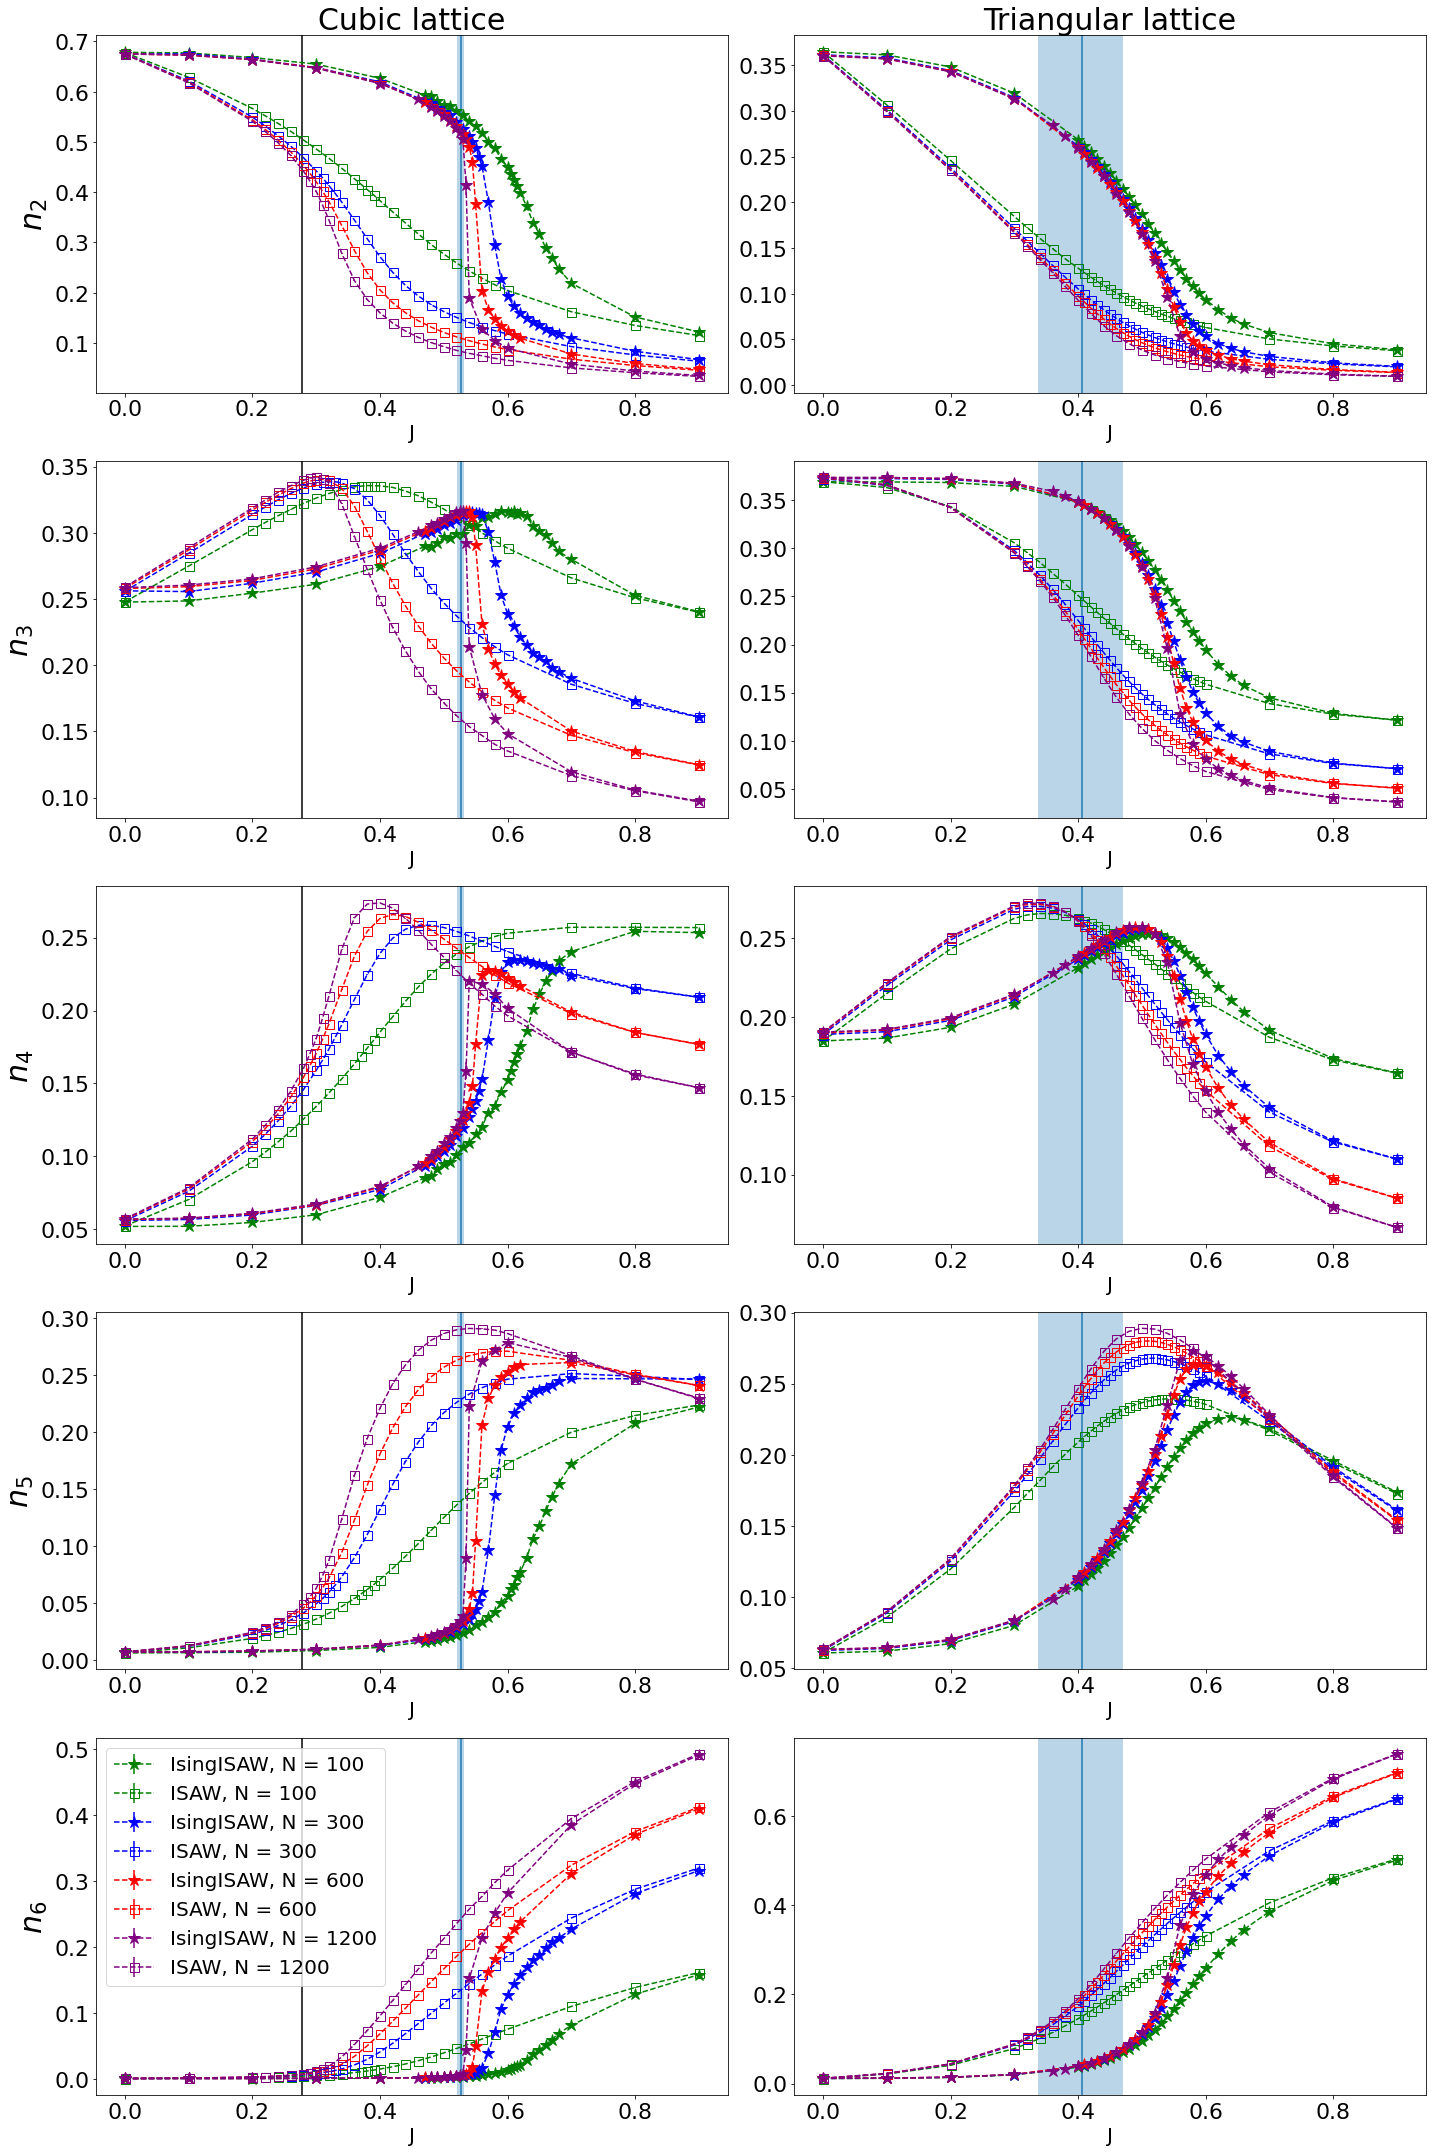

In [18]:
DIR = Path.cwd().parent / "Simulation Results"
dirs = ["Geometry_ISAW_3D_All.txt", "Geometry_Ising_All.txt", "Geometry_TrISAW_All.txt", "Geometry_TrIsing_All.txt"]
data_Is_3D = np.loadtxt(DIR / dirs[1])
data_ISAW_3D = np.loadtxt(DIR / dirs[0])
data_TrIs = np.loadtxt(DIR / dirs[3])
data_TrISAW = np.loadtxt(DIR / dirs[2])

fig, ax = plt.subplots(5, 2, figsize=(20,30))

Ns = np.unique(data_Is_3D[:,0])
k = 0
col = ['green', 'blue', 'red', 'purple']

crit_ISAW3D = 0.2779
crit_TrISAW = [0.337, 0.406, 0.470]
crit_Is3D = [1 / 1.88, 1 / 1.90, 1 / 1.92]

for N in Ns:
    data1 = data_Is_3D[data_Is_3D[:, 0] == N]
    data2 = data_ISAW_3D[data_ISAW_3D[:, 0] == N]
    data3 = data_TrIs[data_TrIs[:, 0] == N]
    data4 = data_TrISAW[data_TrISAW[:, 0] == N]
    for i in range(2,6+1):
        j = i * 2 - 1
        j_TrIs = j + 10
        ax[i - 2, 0].errorbar(data1[:,1], data1[:,j], yerr=data1[:,j+1], c=col[k], ms=13, fmt='*--', label='IsingISAW, N = ' + str(int(N)))
        ax[i - 2, 0].errorbar(data2[:,1], data2[:,j], yerr=data2[:,j+1], c=col[k], ms=9, fmt='s--', fillstyle='none', label='ISAW, N = ' + str(int(N)))
        ax[i - 2, 0].set_ylabel('n' + str(int(i)), fontsize=15)
        ax[i - 2, 1].errorbar(data3[:,1], data3[:,j_TrIs], yerr=data3[:,j_TrIs+1], c=col[k], ms=13, fmt='*--', label='IsingISAW, N = ' + str(int(N)))
        ax[i - 2, 1].errorbar(data4[:,1], data4[:,j], yerr=data4[:,j+1], c=col[k], ms=9, fmt='s--', fillstyle='none', label='ISAW, N = ' + str(int(N)))
    k += 1
    
for i in range(2, 6+1):
    ax[i - 2, 0].set_ylabel(r'$n_' + str(int(i)) + '$', fontsize=30)
    ax[i - 2, 0].set_xlabel('J', fontsize=20)
    ax[i - 2, 1].set_xlabel('J', fontsize=20)
    ax[i - 2, 0].axvline(crit_ISAW3D, c ="k")
    ax[i - 2, 0].axvspan(crit_Is3D[0], crit_Is3D[2], alpha=0.3)
    ax[i - 2, 0].axvline(crit_Is3D[1])
    ax[i - 2, 1].axvspan(crit_TrISAW[0], crit_TrISAW[2], alpha=0.3)
    ax[i - 2, 1].axvline(crit_TrISAW[1])
    ax[i - 2, 0].tick_params(labelsize=22)
    ax[i - 2, 1].tick_params(labelsize=22)
ax[0,0].set_title('Cubic lattice', fontsize=30)
ax[0,1].set_title('Triangular lattice', fontsize=30)
ax[4,0].legend(fontsize=20)
plt.tight_layout()
#plt.savefig(Path.cwd() / "Images" / "Ising_vs_ISAW.png")

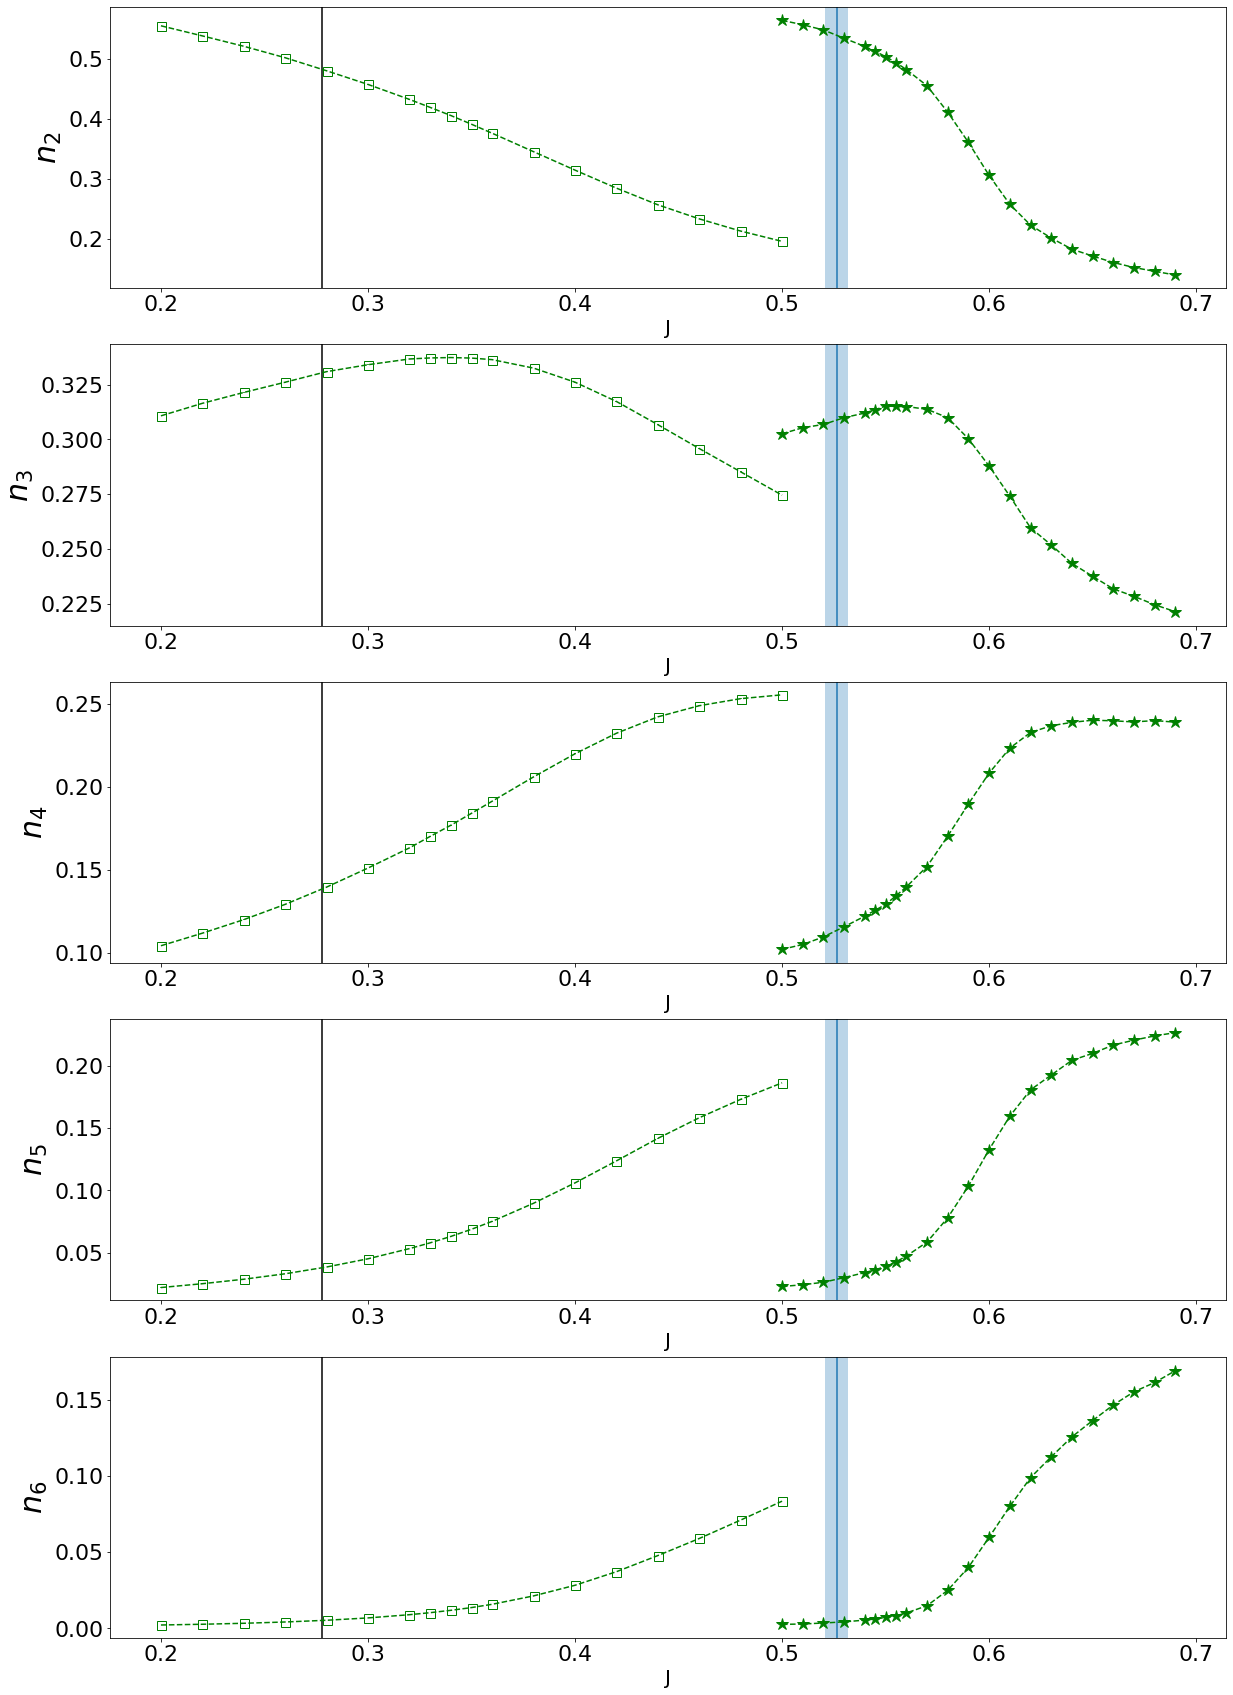

In [3]:
DIR = Path.cwd().parent / "Simulation Results"
dirs = ["Geometry_ISAW_3D_Add.txt", "Geometry_Is_3D_Add.txt"]
data_Is_3D = np.loadtxt(DIR / dirs[1])
data_ISAW_3D = np.loadtxt(DIR / dirs[0])

fig, ax = plt.subplots(5, 1, figsize=(20,30))

Ns = np.unique(data_Is_3D[:,0])
k = 0
col = ['green', 'blue', 'red', 'purple']

crit_ISAW3D = 0.2779
crit_TrISAW = [0.337, 0.406, 0.470]
crit_Is3D = [1 / 1.88, 1 / 1.90, 1 / 1.92]

for N in Ns:
    data1 = data_Is_3D[data_Is_3D[:, 0] == N]
    data2 = data_ISAW_3D[data_ISAW_3D[:, 0] == N]
    for i in range(2,6+1):
        j = i * 2 - 1
        j_TrIs = j + 10
        ax[i - 2].errorbar(data1[:,1], data1[:,j], yerr=data1[:,j+1], c=col[k], ms=13, fmt='*--', label='IsingISAW, N = ' + str(int(N)))
        ax[i - 2].errorbar(data2[:,1], data2[:,j], yerr=data2[:,j+1], c=col[k], ms=9, fmt='s--', fillstyle='none', label='ISAW, N = ' + str(int(N)))
        ax[i - 2].set_ylabel('n' + str(int(i)), fontsize=15)
    k += 1
    
for i in range(2, 6+1):
    ax[i - 2].set_ylabel(r'$n_' + str(int(i)) + '$', fontsize=30)
    ax[i - 2].set_xlabel('J', fontsize=20)
    ax[i - 2].axvline(crit_ISAW3D, c ="k")
    ax[i - 2].axvspan(crit_Is3D[0], crit_Is3D[2], alpha=0.3)
    ax[i - 2].axvline(crit_Is3D[1])
    ax[i - 2].tick_params(labelsize=22)

#plt.savefig(Path.cwd() / "Images" / "Ising_vs_ISAW_200.png")

# Фитирование отклонений пиков от точки перехода

In [4]:
from scipy.stats import linregress as linR
from scipy.optimize import curve_fit as c_f

data_N3_2D_ISAW = np.array([[4900, 0.605, 0.005], [3600, 0.615, 0.005], [2500, 0.61, 0.005],[1000, 0.615, 0.005], [400, 0.615, 0.005], [250, 0.625, 0.005], [100, 0.66, 0.005]])
data_N3_2D_Ising = np.array([[4900, 0.8,0.005], [3600, 0.8, 0.005], [2500, 0.8, 0.005], [1000, 0.8, 0.005], [400, 0.805, 0.005], [250, 0.81, 0.005], [100, 0.85, 0.005]])

data_N3_3D_ISAW = np.array([[1200, 0.3, 0.01], [600, 0.31, 0.01], [300, 0.33, 0.01], [200,0.34,0.01], [100, 0.39, 0.01]])
data_N3_3D_Ising = np.array([[1200, 0.53, 0.005], [600, 0.535, 0.005], [300, 0.545, 0.005], [200,0.555,0.005],[100, 0.61, 0.005]])
data_N4_3D_ISAW = np.array([[1200, 0.4, 0.02], [600, 0.42, 0.02], [300, 0.48, 0.02]])
data_N4_3D_Ising = np.array([[1200, 0.54, 0.02], [600, 0.57, 0.01],[300, 0.63, 0.01]])
data_N5_3D_ISAW = np.array([[1200, 0.54, 0.02], [600, 0.58, 0.02]])
data_N5_3D_Ising = np.array([[1200, 0.6, 0.02], [600, 0.7, 0.1]])

data_N4_TrISAW = np.array([[1200, 0.34, 0.02], [600, 0.34, 0.02], [300, 0.34, 0.02], [100, 0.36, 0.02]])
data_N4_TrIsing = np.array([[1200, 0.5, 0.01], [600, 0.5, 0.01], [300, 0.5, 0.01], [100, 0.52, 0.01]])
data_N5_TrISAW = np.array([[1200, 0.52, 0.02], [600, 0.52, 0.01], [300, 0.53, 0.01], [100, 0.54, 0.01]])
data_N5_TrIsing = np.array([[1200, 0.58, 0.02], [600, 0.59, 0.01], [300, 0.6, 0.02], [100, 0.6, 0.02]])

data_3D_ISAW = [data_N3_3D_ISAW, data_N4_3D_ISAW, data_N5_3D_ISAW]
data_3D_Ising = [data_N3_3D_Ising, data_N4_3D_Ising, data_N5_3D_Ising]

crit_ISAW3D = 0.2779
crit_TrISAW = [0.337, 0.406, 0.470]
crit_Is3D = [1 / 1.88, 1 / 1.90, 1 / 1.92]
crit_ISAW2D=0.6673
crit_Is2D=0.8340

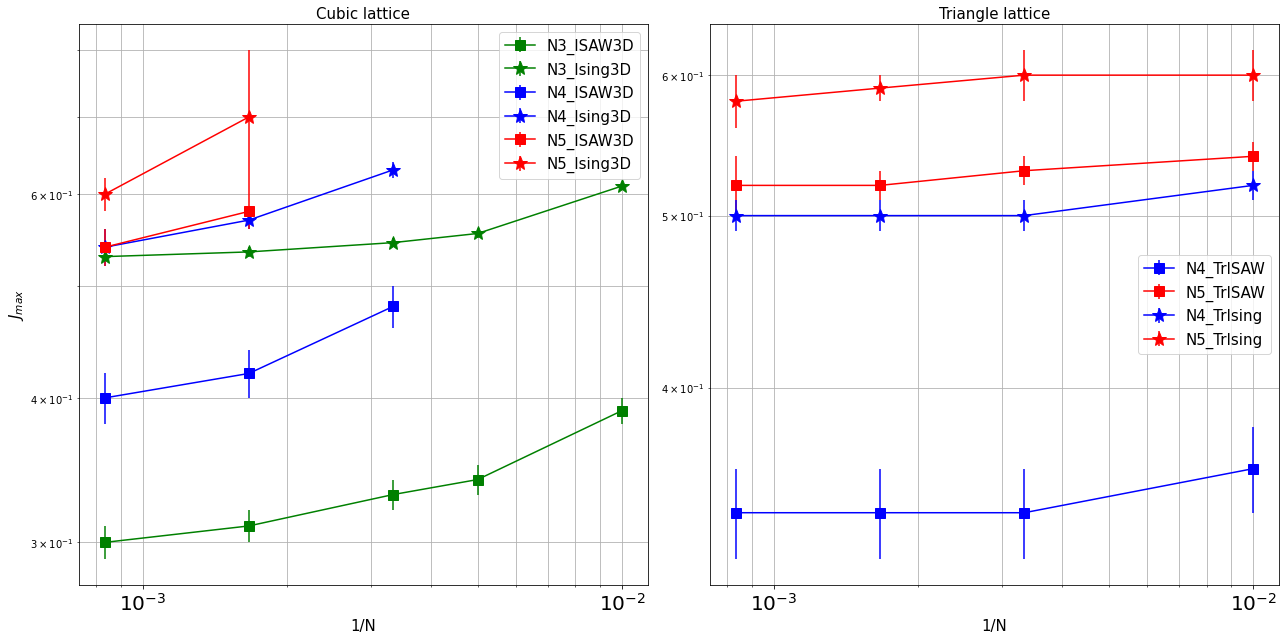

In [5]:
fig,ax = plt.subplots(1, 2, figsize=(18,9))
col = ['green', 'blue', 'red']
ms1=15
ms2=10

for Is, ISAW, c, n in zip(data_3D_Ising, data_3D_ISAW, col, [3,4,5]):
    ax[0].errorbar(1/ISAW[:,0], ISAW[:,1], yerr=ISAW[:,2], fmt='s-',ms=ms2, c=c, label=f'N{n}_ISAW3D')
    ax[0].errorbar(1/Is[:,0], Is[:,1], yerr=Is[:,2], fmt='*-', ms=ms1, c=c, label=f'N{n}_Ising3D')
ax[0].set_ylabel(r'$J_{max}$', fontsize=15)
ax[0].set_title('Cubic lattice', fontsize=15)

ax[1].errorbar(1/data_N4_TrISAW[:,0], data_N4_TrISAW[:,1], yerr=data_N4_TrISAW[:,2], fmt='s-',ms=ms2, c=col[1], label='N4_TrISAW')
ax[1].errorbar(1/data_N5_TrISAW[:,0], data_N5_TrISAW[:,1], yerr=data_N5_TrISAW[:,2], fmt='s-',ms=ms2, c=col[2], label='N5_TrISAW')
ax[1].errorbar(1/data_N4_TrIsing[:,0], data_N4_TrIsing[:,1], yerr=data_N4_TrIsing[:,2], fmt='*-', ms=ms1,c=col[1], label='N4_TrIsing')
ax[1].errorbar(1/data_N5_TrIsing[:,0], data_N5_TrIsing[:,1], yerr=data_N5_TrIsing[:,2], fmt='*-', ms=ms1,c=col[2], label='N5_TrIsing')

ax[1].set_title('Triangle lattice',fontsize=15)
for i in [0,1]:
    ax[i].set_xlabel('1/N', fontsize=15)
    ax[i].legend(fontsize=15)
    ax[i].set_yscale('log')
    ax[i].set_xscale('log')
    ax[i].grid(True, 'both')
ax[0].tick_params(labelsize=20)
ax[1].tick_params(labelsize=20)
plt.tight_layout()
#plt.savefig(Path.cwd() / "Images" / "IsingISAW_Peaks.png")

### Лог-лог масштаб

log(y) = a log(x) + b => y = e^b * x^a
n3_peak_Ising_2D(1/N) = e ^ -4.721864598399829 * x ^ -0.17086456726852306, error is (d_a = 0.040957892657112596, d_b = 0.2836708561963036)
n3_peak_ISAW_2D(1/N) = e ^ -5.823700810094428 * x ^ -0.3827771247464148, error is (d_a = 0.15391101787275097, d_b = 1.0659745261680598)

n3_peak_Ising_3D(1/N) = e ^ 3.0685677866869057 * x ^ 1.2272165147862713, error is (d_a = 0.05090275466666708, d_b = 0.29942140213490587)
n3_peak_ISAW_3D(1/N) = e ^ 0.7189091608479332 * x ^ 0.6450611095616572, error is (d_a = 0.034531191381785606, d_b = 0.20312020063805336)


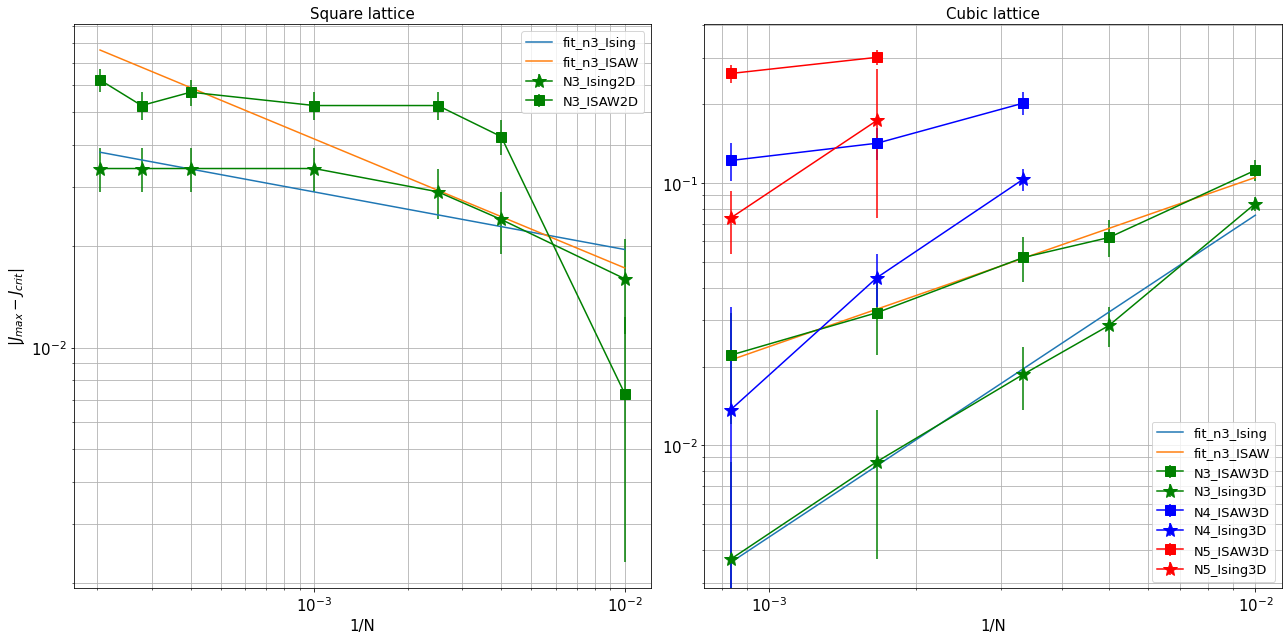

In [44]:
fig,ax = plt.subplots(1, 2,figsize=(18,9))
col = ['green', 'blue', 'red']
ms1=15
ms2=10

print("log(y) = a log(x) + b => y = e^b * x^a")

ax[0].errorbar(1/data_N3_2D_Ising[:,0], abs(data_N3_2D_Ising[:,1] - crit_Is2D), yerr=data_N3_2D_Ising[:,2], fmt='*-', ms=ms1, c=col[0], label='N3_Ising2D')
ax[0].errorbar(1/data_N3_2D_ISAW[:,0], abs(data_N3_2D_ISAW[:,1] - crit_ISAW2D), yerr=data_N3_2D_ISAW[:,2], fmt='s-',ms=ms2, c=col[0], label='N3_ISAW2D')

x = 1/data_N3_2D_Ising[:,0]
y = abs(data_N3_2D_Ising[:,1] - crit_Is2D)
res = linR(np.log(x), np.log(y))
ax[0].plot(x, np.exp(res.intercept) * (x) ** res.slope, label='fit_n3_Ising')
print(f'n3_peak_Ising_2D(1/N) = e ^ {res.intercept} * x ^ {res.slope}, error is (d_a = {res.stderr}, d_b = {res.intercept_stderr})')

x = 1/data_N3_2D_ISAW[:,0]
y = abs(data_N3_2D_ISAW[:,1] - crit_ISAW2D)
res = linR(np.log(x), np.log(y))
ax[0].plot(x, np.exp(res.intercept) * (x) ** res.slope, label='fit_n3_ISAW')
print(f'n3_peak_ISAW_2D(1/N) = e ^ {res.intercept} * x ^ {res.slope}, error is (d_a = {res.stderr}, d_b = {res.intercept_stderr})',end='\n\n')

for Is, ISAW, c, n in zip(data_3D_Ising, data_3D_ISAW, col, [3,4,5]):
    ax[1].errorbar(1/ISAW[:,0], ISAW[:,1] - crit_ISAW3D, yerr=ISAW[:,2], fmt='s-',ms=ms2, c=c, label=f'N{n}_ISAW3D')
    ax[1].errorbar(1/Is[:,0], Is[:,1] - crit_Is3D[1], yerr=Is[:,2], fmt='*-', ms=ms1, c=c, label=f'N{n}_Ising3D')
ax[0].set_ylabel(r'$J_{max}$', fontsize=15)
ax[0].set_title('Cubic lattice', fontsize=15)

x = 1/data_3D_Ising[0][:,0]
y = data_3D_Ising[0][:,1] - crit_Is3D[1]
res = linR(np.log(x), np.log(y))
ax[1].plot(x, np.exp(res.intercept) * (x) ** res.slope, label='fit_n3_Ising')
print(f'n3_peak_Ising_3D(1/N) = e ^ {res.intercept} * x ^ {res.slope}, error is (d_a = {res.stderr}, d_b = {res.intercept_stderr})')

x = 1/data_3D_ISAW[0][:,0]
y = data_3D_ISAW[0][:,1] - crit_ISAW3D
res = linR(np.log(x), np.log(y))
ax[1].plot(x, np.exp(res.intercept) * (x) ** res.slope, label='fit_n3_ISAW')
print(f'n3_peak_ISAW_3D(1/N) = e ^ {res.intercept} * x ^ {res.slope}, error is (d_a = {res.stderr}, d_b = {res.intercept_stderr})')

for i, name in zip([0,1] , ['Square lattice' , 'Cubic lattice']):
    ax[i].set_title(name, fontsize=15)
    ax[i].set_xlabel('1/N', fontsize=15)
    ax[i].set_xscale('log')
    ax[i].grid(True, 'both')
    ax[i].tick_params(labelsize=15)
    ax[i].legend(fontsize=13)
ax[1].set_yscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel(r'$|J_{max} - J_{crit}|$', fontsize=15)

#ax[0].set_yscale('symlog')

plt.tight_layout()
#plt.savefig(Path.cwd() / "Images" / "IsingISAW_Peaks_2D-3D(log-log).png")

### Y-log X-линейный масштаб

log(y) = a x + b => y = e^(a x + b)
n3_peak_Ising_2D(1/N) = e ^ (-79.94946149012347 * x + -3.3516123872550034), error is (d_a = 4.1669766792378455, d_b = 0.01750476071318423)
n3_peak_ISAW_2D(1/N) = e ^ (-205.14535047140592 * x + -2.6856316235532436), error is (d_a = 26.800538843631937, d_b = 0.1125845080390474)

n3_peak_Ising_3D(1/N) = e ^ (311.3254055019239 * x + -5.369616728679347), error is (d_a = 56.02576800016617, d_b = 0.29601900808940584)
n3_peak_ISAW_3D(1/N) = e ^ (164.56487094038164 * x + -3.720295059946418), error is (d_a = 28.279287564978134, d_b = 0.14941707991285488)


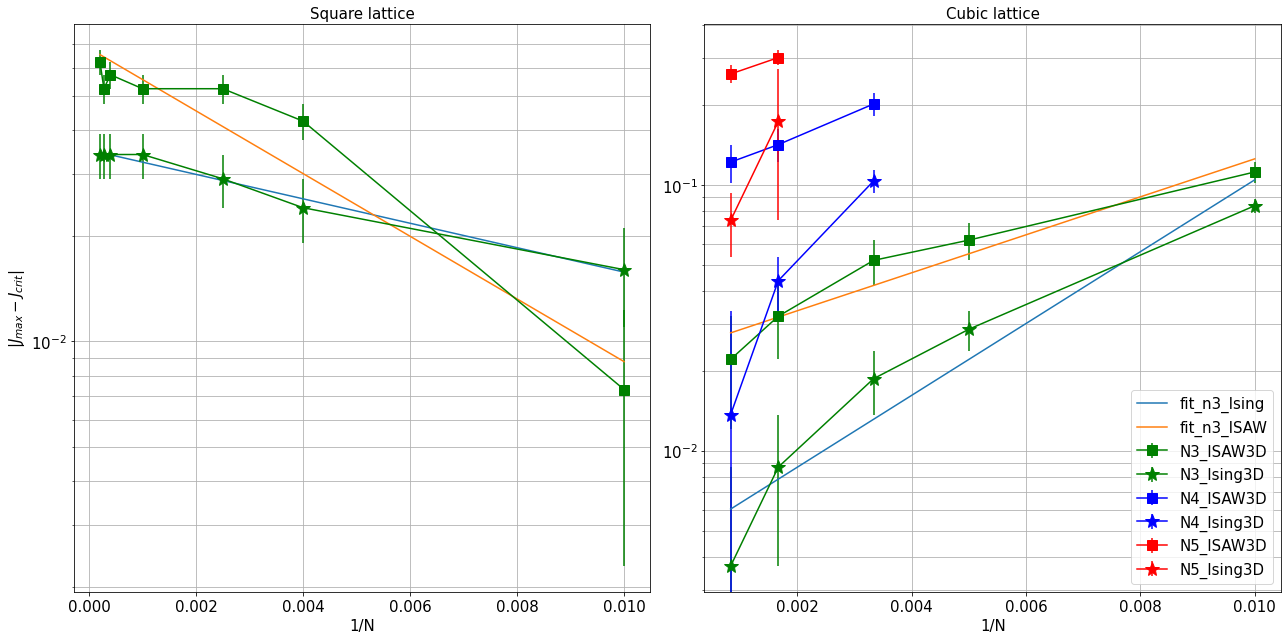

In [45]:
fig,ax = plt.subplots(1, 2,figsize=(18,9))
col = ['green', 'blue', 'red']
ms1=15
ms2=10

print("log(y) = a x + b => y = e^(a x + b)")

x = 1/data_N3_2D_Ising[:,0]
y = abs(data_N3_2D_Ising[:,1] - crit_Is2D)
res = linR(x, np.log(y))
ax[0].plot(x, np.exp(x * res.slope + res.intercept), label='fit_n3_Ising')
print(f'n3_peak_Ising_2D(1/N) = e ^ ({res.slope} * x + {res.intercept}), error is (d_a = {res.stderr}, d_b = {res.intercept_stderr})')

ax[0].errorbar(x, y, yerr=data_N3_2D_Ising[:,2], fmt='*-', ms=ms1, c=col[0], label='N3_Ising2D')


x = 1/data_N3_2D_ISAW[:,0]
y = abs(data_N3_2D_ISAW[:,1] - crit_ISAW2D)
res = linR(x, np.log(y))
ax[0].plot(x, np.exp(x * res.slope + res.intercept), label='fit_n3_ISAW')
print(f'n3_peak_ISAW_2D(1/N) = e ^ ({res.slope} * x + {res.intercept}), error is (d_a = {res.stderr}, d_b = {res.intercept_stderr})',end='\n\n')

ax[0].errorbar(x, y, yerr=data_N3_2D_ISAW[:,2], fmt='s-',ms=ms2, c=col[0], label='N3_ISAW2D')

for Is, ISAW, c, n in zip(data_3D_Ising, data_3D_ISAW, col, [3,4,5]):
    ax[1].errorbar(1/ISAW[:,0], ISAW[:,1] - crit_ISAW3D, yerr=ISAW[:,2], fmt='s-',ms=ms2, c=c, label=f'N{n}_ISAW3D')
    ax[1].errorbar(1/Is[:,0], Is[:,1] - crit_Is3D[1], yerr=Is[:,2], fmt='*-', ms=ms1, c=c, label=f'N{n}_Ising3D')
ax[0].set_ylabel(r'$|J_{max} - J_{crit}|$', fontsize=15)
ax[0].set_title('Cubic lattice', fontsize=15)

x = 1/data_3D_Ising[0][:,0]
y = data_3D_Ising[0][:,1] - crit_Is3D[1]
res = linR(x, np.log(y))
ax[1].plot(x, np.exp(x * res.slope + res.intercept), label='fit_n3_Ising')
print(f'n3_peak_Ising_3D(1/N) = e ^ ({res.slope} * x + {res.intercept}), error is (d_a = {res.stderr}, d_b = {res.intercept_stderr})')

x = 1/data_3D_ISAW[0][:,0]
y = data_3D_ISAW[0][:,1] - crit_ISAW3D
res = linR(x, np.log(y))
ax[1].plot(x, np.exp(x * res.slope + res.intercept), label='fit_n3_ISAW')
print(f'n3_peak_ISAW_3D(1/N) = e ^ ({res.slope} * x + {res.intercept}), error is (d_a = {res.stderr}, d_b = {res.intercept_stderr})')

for i, name in zip([0,1] , ['Square lattice' , 'Cubic lattice']):
    ax[i].set_title(name, fontsize=15)
    ax[i].set_xlabel('1/N', fontsize=15)
    ax[i].grid(True, 'both')
    ax[i].tick_params(labelsize=15)

ax[1].legend(fontsize=15)
#ax[0].set_yscale('symlog')
ax[1].set_yscale('log')
ax[0].set_yscale('log')
plt.tight_layout()
#plt.savefig(Path.cwd() / "Images" / "IsingISAW_Peaks_2D-3D(log-linear).png")

### Линейный масштаб

y = a x + b
n3_peak_Ising_2D(1/N) = 5.073336974835065 * x + -0.038036766716165446, error is (d_a = 0.47351578977821834, d_b = 0.001989159343099133)
n3_peak_ISAW_2D(1/N) = 5.061493536222171 * x + -0.05987709465566292, error is (d_a = 0.49822028438359717, d_b = 0.002092938725585719)

n3_peak_Ising_3D(1/N) = 8.763157894736839 * x + -0.007828947368420991, error is (d_a = 0.7828670937180735, d_b = 0.004136374186741585)
n3_peak_ISAW_3D(1/N) = 9.631578947368425 * x + 0.015968421052631583, error is (d_a = 0.3889042779349621, d_b = 0.002054823391188366)


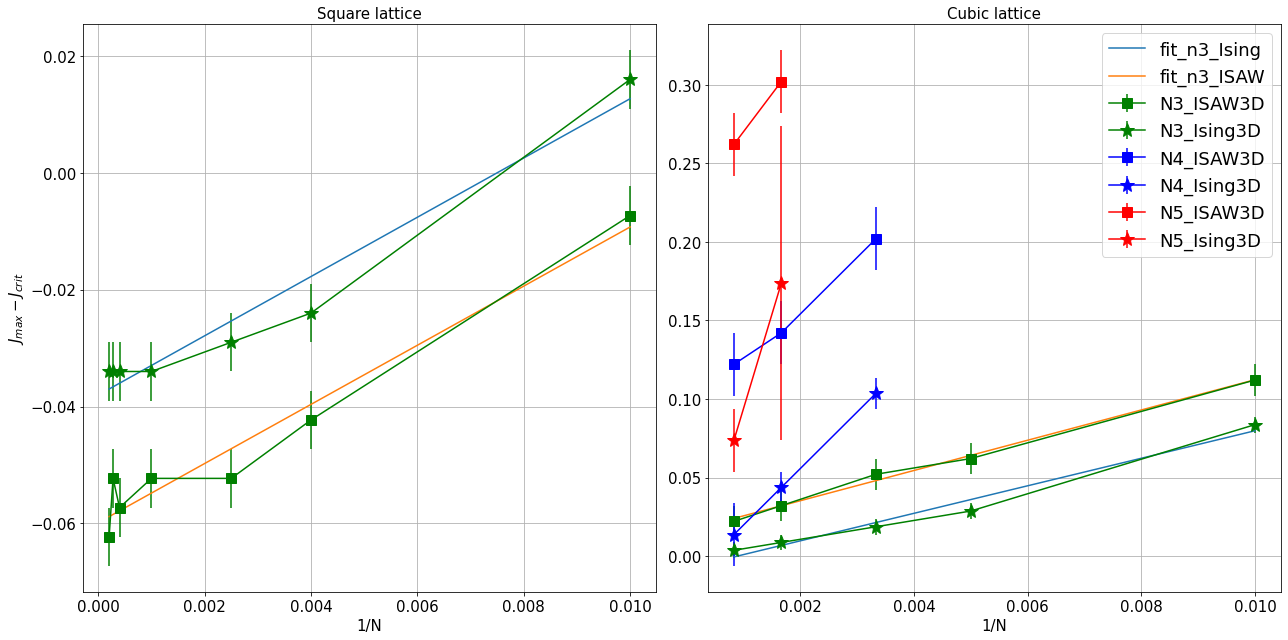

In [46]:
fig,ax = plt.subplots(1, 2,figsize=(18,9))
col = ['green', 'blue', 'red']
ms1=15
ms2=10

print("y = a x + b")

ax[0].errorbar(1/data_N3_2D_Ising[:,0], data_N3_2D_Ising[:,1] - crit_Is2D, yerr=data_N3_2D_Ising[:,2], fmt='*-', ms=ms1, c=col[0], label='N3_Ising2D')
ax[0].errorbar(1/data_N3_2D_ISAW[:,0], data_N3_2D_ISAW[:,1] - crit_ISAW2D, yerr=data_N3_2D_ISAW[:,2], fmt='s-',ms=ms2, c=col[0], label='N3_ISAW2D')

x = 1/data_N3_2D_Ising[:,0]
y = data_N3_2D_Ising[:,1] - crit_Is2D
res = linR(x, y)
ax[0].plot(x, x * res.slope + res.intercept, label='fit_n3_Ising')
print(f'n3_peak_Ising_2D(1/N) = {res.slope} * x + {res.intercept}, error is (d_a = {res.stderr}, d_b = {res.intercept_stderr})')

x = 1/data_N3_2D_ISAW[:,0]
y = data_N3_2D_ISAW[:,1] - crit_ISAW2D
res = linR(x, y)
ax[0].plot(x, x * res.slope + res.intercept, label='fit_n3_ISAW')
print(f'n3_peak_ISAW_2D(1/N) = {res.slope} * x + {res.intercept}, error is (d_a = {res.stderr}, d_b = {res.intercept_stderr})',end='\n\n')

for Is, ISAW, c, n in zip(data_3D_Ising, data_3D_ISAW, col, [3,4,5]):
    ax[1].errorbar(1/ISAW[:,0], ISAW[:,1] - crit_ISAW3D, yerr=ISAW[:,2], fmt='s-',ms=ms2, c=c, label=f'N{n}_ISAW3D')
    ax[1].errorbar(1/Is[:,0], Is[:,1] - crit_Is3D[1], yerr=Is[:,2], fmt='*-', ms=ms1, c=c, label=f'N{n}_Ising3D')
ax[0].set_ylabel(r'$J_{max}-J_{crit}$', fontsize=15)
ax[0].set_title('Cubic lattice', fontsize=15)

x = 1/data_3D_Ising[0][:,0]
y = data_3D_Ising[0][:,1] - crit_Is3D[1]
res = linR(x, y)
ax[1].plot(x, x * res.slope + res.intercept, label='fit_n3_Ising')
print(f'n3_peak_Ising_3D(1/N) = {res.slope} * x + {res.intercept}, error is (d_a = {res.stderr}, d_b = {res.intercept_stderr})')

x = 1/data_3D_ISAW[0][:,0]
y = data_3D_ISAW[0][:,1] - crit_ISAW3D
res = linR(x, y)
ax[1].plot(x, x * res.slope + res.intercept, label='fit_n3_ISAW')
print(f'n3_peak_ISAW_3D(1/N) = {res.slope} * x + {res.intercept}, error is (d_a = {res.stderr}, d_b = {res.intercept_stderr})')

for i, name in zip([0,1] , ['Square lattice' , 'Cubic lattice']):
    ax[i].set_title(name, fontsize=15)
    ax[i].set_xlabel('1/N', fontsize=15)
    ax[i].grid(True, 'both')
    ax[i].tick_params(labelsize=15)
    
ax[1].legend(fontsize=18)
plt.tight_layout()
#plt.savefig(Path.cwd() / "Images" / "IsingISAW_Peaks_2D-3D(linear-linear).png")

### Подсчёт соседей у гиперкуба в J=0

(Увеличено в масштабе для n=3)

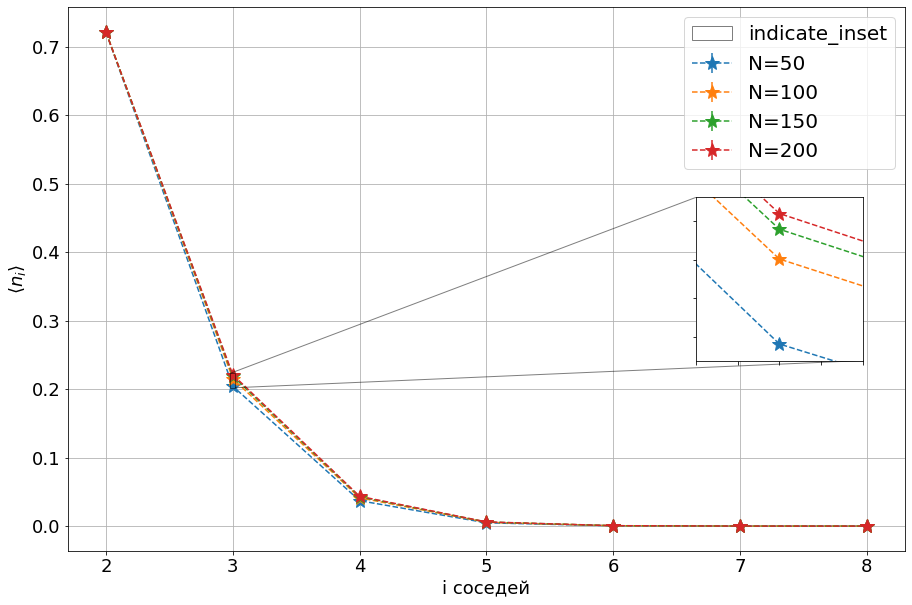

In [52]:
#%matplotlib
DIR = Path.cwd().parent / "Simulation Results"
data = np.loadtxt(DIR / "Geometry_Is_4D_All.txt")
fig, ax = plt.subplots(figsize=(15,10))
n = [2,3,4,5,6,7,8]
for d in data:
    ax.errorbar(n, d[13:27:2], yerr=d[14:28:2], fmt='*--', ms=15, label='N=' + str(int(d[0])))
ax.grid(True)
ax.set_xlabel("i соседей", fontsize=18)
ax.set_ylabel(r"$\langle n_{i} \rangle$", fontsize=18)
ax.tick_params(labelsize=18)

axins=ax.inset_axes([0.75, 0.35, 0.2, 0.3])
for d in data:
    axins.errorbar(n, d[13:27:2], yerr=d[14:28:2], fmt='*--', ms=15, label='N=' + str(int(d[0])))
x1, x2, y1, y2 = 2.98, 3.02, 0.202, 0.223
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])
ax.indicate_inset_zoom(axins, edgecolor="black")

ax.legend(fontsize=20)